In [2]:
import torch
import numpy as np
np.set_printoptions(precision=3)

In [3]:
a = [1,2,3]
b = np.array([4,5,6],dtype=np.int32)

In [4]:
t_a = torch.tensor(a)
t_b = torch.tensor(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [5]:
t_ones = torch.ones(2,3)
t_ones

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [12]:
t_rand =  torch.rand(2,3)
print(t_rand)

torch.argmax(t_rand, dim=1)

tensor([[0.1034, 0.9843, 0.4221],
        [0.2556, 0.4686, 0.8554]])


tensor([1, 2])

### Manipulating data type and shapes of tensors

In [124]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [125]:
# Transposing a tensor

torch.transpose(t_rand,0,1)

tensor([[0.1895, 0.8313],
        [0.6085, 0.8116],
        [0.9314, 0.8553]])

In [126]:
# Reshaping a tensor

t_zeros = torch.zeros(30)
t_zeros = t_zeros.reshape(5,6)
t_zeros

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [127]:
t_zeros = torch.zeros(1,2,1,4,1)
torch.squeeze(t_zeros)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

### Math operations on tensors

In [128]:
torch.manual_seed(1)

In [129]:
t1 = 2 * torch.rand(5,2)-1
t1

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])

In [130]:
t2 = torch.normal(mean=0,std=1,size=(5,2))
t2

tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])

In [131]:
# element wise product t1, t2
t3 = torch.multiply(t1,t2)
t3

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [132]:
# compute mean,sum, std along certain axis.
t4 = torch.mean(t1,axis=0)
t4

tensor([-0.1373,  0.2028])

In [133]:
# Matrix multiplication  
torch.matmul(t1,torch.transpose(t2,0,1))

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])

### Split, Stack and concatenate tensors

In [134]:
t = torch.rand(6)
t

tensor([0.6397, 0.9743, 0.8300, 0.0444, 0.0246, 0.2588])

In [135]:
t_chunks = torch.chunk(t,3)
t_chunks

(tensor([0.6397, 0.9743]), tensor([0.8300, 0.0444]), tensor([0.0246, 0.2588]))

In [136]:
[item.numpy() for item in t_splits]

[array([0.056, 0.864, 0.426, 0.781], dtype=float32),
 array([0.661, 0.125], dtype=float32)]

In [137]:
t_splits = torch.split(t,split_size_or_sections=[4,2])
t_splits

(tensor([0.6397, 0.9743, 0.8300, 0.0444]), tensor([0.0246, 0.2588]))

In [138]:
A = torch.ones(3)
B = torch.ones(2)
C = torch.cat([A,B],axis=0)

C

tensor([1., 1., 1., 1., 1.])

In [139]:
A = torch.ones(3)
B = torch.zeros(3)
D = torch.stack([A,B],axis=1)

D

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])

### Building Input pipelines

In [140]:
# if data exists in list, numpy array or tensor we can use dataloader to iterate thru objects
t = torch.arange(6, dtype=torch.float32)
t

tensor([0., 1., 2., 3., 4., 5.])

In [141]:
from torch.utils.data import DataLoader
dataloader = DataLoader(t)

for item in dataloader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [142]:
# create batches from dataset and iterate
dataloader = DataLoader(t, batch_size=3,drop_last=False)
for i, batch in enumerate(dataloader,1):
    print(f'batch {i}',batch)
    

batch 1 tensor([0., 1., 2.])
batch 2 tensor([3., 4., 5.])


### Combine two tensors 

In [143]:
t_x = torch.rand([4,3], dtype=torch.float32)
t_y = torch.arange(4)
print(t_x)
print(t_y)

tensor([[0.9906, 0.2885, 0.8750],
        [0.5059, 0.2366, 0.7570],
        [0.2346, 0.6471, 0.3556],
        [0.4452, 0.0193, 0.2616]])
tensor([0, 1, 2, 3])


In [144]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    

In [145]:
joint_dataset = JointDataset(t_x,t_y)

for ex in joint_dataset:
    print('x:', ex[0], 'y:', ex[1])

x: tensor([0.9906, 0.2885, 0.8750]) y: tensor(0)
x: tensor([0.5059, 0.2366, 0.7570]) y: tensor(1)
x: tensor([0.2346, 0.6471, 0.3556]) y: tensor(2)
x: tensor([0.4452, 0.0193, 0.2616]) y: tensor(3)


### Shuffle, batch and repeat

In [146]:
dataloader = DataLoader(joint_dataset, batch_size=2,drop_last=False)

for i, batch in enumerate(dataloader,1):
    print(f'batch {i}', 'x:', batch[0] ,
    '\n y: ',batch[1])

batch 1 x: tensor([[0.9906, 0.2885, 0.8750],
        [0.5059, 0.2366, 0.7570]]) 
 y:  tensor([0, 1])
batch 2 x: tensor([[0.2346, 0.6471, 0.3556],
        [0.4452, 0.0193, 0.2616]]) 
 y:  tensor([2, 3])


In [147]:
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(dataloader,1):
        print(f'batch {i}', 'x:', batch[0] ,
        '\n y: ',batch[1])
    

epoch 1
batch 1 x: tensor([[0.9906, 0.2885, 0.8750],
        [0.5059, 0.2366, 0.7570]]) 
 y:  tensor([0, 1])
batch 2 x: tensor([[0.2346, 0.6471, 0.3556],
        [0.4452, 0.0193, 0.2616]]) 
 y:  tensor([2, 3])
epoch 2
batch 1 x: tensor([[0.9906, 0.2885, 0.8750],
        [0.5059, 0.2366, 0.7570]]) 
 y:  tensor([0, 1])
batch 2 x: tensor([[0.2346, 0.6471, 0.3556],
        [0.4452, 0.0193, 0.2616]]) 
 y:  tensor([2, 3])


### Load data from local disk

In [148]:
import pathlib

image_dir = pathlib.Path('/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images')
image_list = sorted([ str(path) for path in image_dir.glob('*.jpg')])
image_list

['/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/American_water_spaniel_00648.jpg',
 '/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/Brittany_02625.jpg',
 '/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/Curly-coated_retriever_03896.jpg',
 '/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/Labrador_retriever_06449.jpg',
 '/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/Labrador_retriever_06455.jpg',
 '/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/Labrador_retriever_06457.jpg',
 '/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/Welsh_springer_spaniel_08203.jpg',
 '/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/cat1.jpg',
 '/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/cat2.jpg']

Image shape:  (375, 500, 3)
Image shape:  (664, 450, 3)
Image shape:  (480, 640, 3)
Image shape:  (469, 625, 3)
Image shape:  (487, 700, 3)
Image shape:  (546, 500, 3)
Image shape:  (374, 500, 3)
Image shape:  (440, 800, 3)
Image shape:  (539, 960, 3)


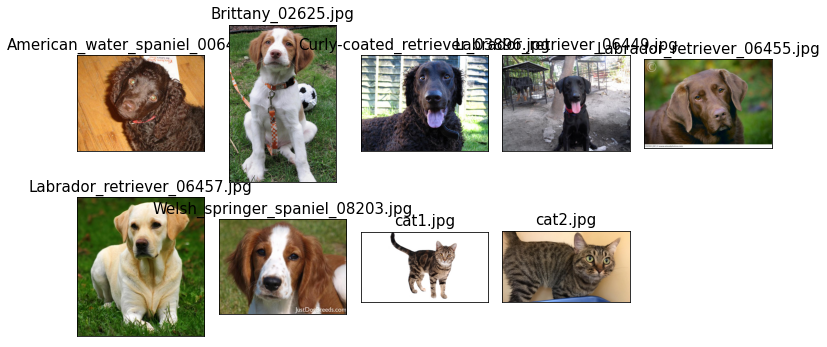

In [149]:
import os

from PIL import Image
fig = plt.figure(figsize=(10,5))

for i, file in enumerate(image_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2,5,i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file),size=15)

plt.tight_layout()
plt.show()
    

In [150]:
labels = [1 if 'cat' in os.path.basename(file) else 0 for file in image_list]
labels

[0, 0, 0, 0, 0, 0, 0, 1, 1]

In [151]:
class ImageDataset(Dataset):
    def __init__(self,image_list,labels):
        self.image_list = image_list
        self.labels = labels
    
    def __getitem__(self, index):
        file = self.image_list[index]
        label = self.labels[index]
        return file,label
    
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(image_list, labels)

for file,label in image_dataset:
    print(file,label)

/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/American_water_spaniel_00648.jpg 0
/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/Brittany_02625.jpg 0
/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/Curly-coated_retriever_03896.jpg 0
/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/Labrador_retriever_06449.jpg 0
/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/Labrador_retriever_06455.jpg 0
/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/Labrador_retriever_06457.jpg 0
/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/Welsh_springer_spaniel_08203.jpg 0
/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/cat1.jpg 1
/Users/rc/workspaces/deep-learning-v2-pytorch/project-dog-classification/images/cat2.jpg 1


### Transform dataset 

In [152]:
import torchvision.transforms as transforms

img_height, img_width = 80,120

transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((img_height, img_width))])

In [153]:
class ImageDataset(Dataset):
    def __init__(self,image_list,labels, transform=None):
        self.image_list = image_list
        self.labels = labels
        self.transform = transform
    
    def __getitem__(self, index):
        img = Image.open(self.image_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img,label
    
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(image_list, labels, transform)
image_dataset


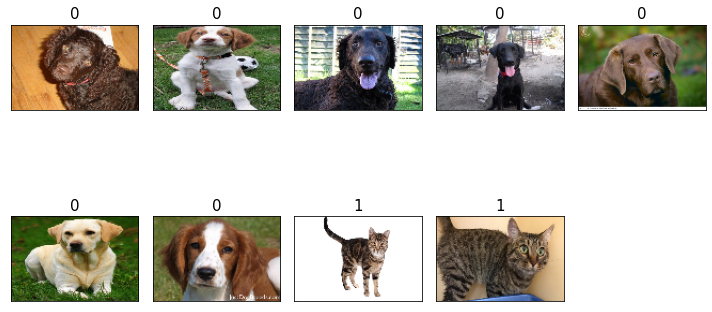

In [154]:
fig = plt.figure(figsize=(10,6))
for i, ex in enumerate(image_dataset):
    ax = fig.add_subplot(2,5,i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(ex[0].numpy().transpose((1,2,0)))
    ax.set_title(f'{ex[1]}',size=15)

plt.tight_layout()
plt.show()